# Introduction:
A typical 4G network consists of several nodes connected to each other, where each node serves
users in the surrounding area. While users are accessing network services, their mobile phones
record Key Performance Indicators (KPI’s) which can help network operators in assessing their
quality of service.

There are many KPI’s which evaluate different aspects of the network. For example, RSRP
(Reference Signals Received Power) is a KPI which measures the network coverage in the user’s
location. Traffic Volume is another KPI which measures how much data has been consumed by the
user.

# Importing tools:

In [42]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
# The wordclouds lib
from wordcloud import WordCloud

# the plotting libs
import holoviews as hv
from holoviews.operation.datashader import datashade, inspect, rasterize
# colour maps lib
import colorcet as cc
# a lib for plotting a large dataset
import datashader as ds
from datashader.utils import lnglat_to_meters
# panel lib for widgets
import panel as pn
pn.extension()
hv.extension('bokeh')

# Reading Data:

In [2]:
RSRP_data = pd.read_csv("RSRP.csv")
Traffic_volumn_data = pd.read_csv("TrafficVolume.csv")

# EDA & Data Cleaning:

In [3]:
RSRP_data.head(10)

Timestamp  LocationLatitude  LocationLongitude  \
0  2019-11-02 00:09:29.386 +0300          24.54054          46.784737   
1  2019-11-02 00:09:29.386 +0300          24.54054          46.784737   
2  2019-11-02 00:10:45.323 +0300          24.54054          46.784737   
3  2019-11-02 00:10:45.323 +0300          24.54054          46.784737   
4  2019-11-02 00:11:26.822 +0300          24.54054          46.784737   
5  2019-11-02 00:11:26.822 +0300          24.54054          46.784737   
6  2019-11-02 00:17:44.340 +0300          24.54054          46.784737   
7  2019-11-02 00:17:44.340 +0300          24.54054          46.784737   
8  2019-11-02 00:23:41.693 +0300          24.54054          46.784737   
9  2019-11-02 00:23:41.693 +0300          24.54054          46.784737   

  RadioConnectionType       Country RadioNetworkGeneration RadioOperatorName  \
0              Mobile  Saudi Arabia                     4G        Operator C   
1              Mobile  Saudi Arabia                     4G        Operator C   
2              Mobile  Saudi Arabia                     3G        Operator C   
3              Mobile  Saudi Arabia                     3G        Operator C   
4              Mobile  Saudi Arabia                     4G        Operator C   
5              Mobile  Saudi Arabia                     4G        Operator C   
6              Mobile  Saudi Arabia                     3G        Operator C   
7              Mobile  Saudi Arabia                     3G        Operator C   
8              Mobile  Saudi Arabia                     2G        Operator C   
9              Mobile  Saudi Arabia                     2G        Operator C   

         RSRP RadioMobileDataEnabled DeviceManufacturer           DeviceName  
0  2147483647                Enabled                HTC                D728W  
1  2147483647                Enabled                HTC  Desire 728 Dual Sim  
2  2147483647                Enabled                HTC                D728W  
3  2147483647                Enabled                HTC  Desire 728 Dual Sim  
4  2147483647                Enabled                HTC                D728W  
5  2147483647                Enabled                HTC  Desire 728 Dual Sim  
6  2147483647                Enabled                HTC                D728W  
7  2147483647                Enabled                HTC  Desire 728 Dual Sim  
8  2147483647                Enabled                HTC                D728W  
9  2147483647                Enabled                HTC  Desire 728 Dual Sim

In [4]:
RSRP_data.sample(20)

Timestamp  LocationLatitude  LocationLongitude  \
1879844  2019-11-03 22:45:32.999 +0300         24.790815          46.781754   
1006570  2019-11-03 09:03:01.024 +0300         24.576569          46.590620   
1799151  2019-11-04 07:05:21.798 +0300         24.570211          46.696323   
871676   2019-11-02 18:55:22.000 +0300         24.757381          46.740560   
2172404  2019-11-03 18:58:19.000 +0300         24.755196          46.678410   
390779   2019-11-02 17:10:36.001 +0300         24.661507          46.727150   
2153058  2019-11-04 05:15:11.000 +0300         24.832497          46.759922   
862217   2019-11-02 13:35:47.000 +0300         24.570580          46.642650   
1734992  2019-11-03 19:21:26.027 +0300         24.690386          46.682730   
681107   2019-11-03 21:11:29.058 +0300         24.685873          46.821293   
698144   2019-11-02 19:27:34.636 +0300         24.758688          46.662857   
2395369  2019-11-04 20:41:20.087 +0300         24.688480          46.722836   
2343315  2019-11-04 13:33:15.000 +0300         24.728592          46.591526   
1771367  2019-11-04 05:37:57.003 +0300         24.678495          46.678220   
2476465  2019-11-04 18:25:13.000 +0300         24.600582          46.787155   
2401438  2019-11-04 15:53:12.803 +0300         24.758688          46.662857   
1356677  2019-11-03 16:58:00.000 +0300         24.573400          46.759373   
2643333  2019-11-04 21:37:39.000 +0300         24.588718          46.726050   
824785   2019-11-03 23:30:20.001 +0300         24.732035          46.610527   
2151811  2019-11-04 14:15:57.000 +0300         24.664679          46.699768   

        RadioConnectionType       Country RadioNetworkGeneration  \
1879844              Mobile  Saudi Arabia                     4G   
1006570              Mobile  Saudi Arabia                     4G   
1799151              Mobile  Saudi Arabia                     4G   
871676               Mobile  Saudi Arabia                     3G   
2172404              Mobile  Saudi Arabia                     4G   
390779               Mobile  Saudi Arabia                     3G   
2153058              Mobile  Saudi Arabia                     4G   
862217               Mobile  Saudi Arabia                     4G   
1734992              Mobile  Saudi Arabia                     4G   
681107               Mobile  Saudi Arabia                     3G   
698144               Mobile  Saudi Arabia                     4G   
2395369              Mobile  Saudi Arabia                     4G   
2343315              Mobile  Saudi Arabia                     4G   
1771367              Mobile  Saudi Arabia                     4G   
2476465              Mobile  Saudi Arabia                     4G   
2401438              Mobile  Saudi Arabia                     4G   
1356677              Mobile  Saudi Arabia                     4G   
2643333              Mobile  Saudi Arabia                     4G   
824785               Mobile  Saudi Arabia                     4G   
2151811              Mobile  Saudi Arabia                     4G   

        RadioOperatorName        RSRP RadioMobileDataEnabled  \
1879844        Operator A         -81                Enabled   
1006570        Operator A         -80                Enabled   
1799151        Operator C         -85                Enabled   
871676         Operator A  2147483647                Enabled   
2172404        Operator C        -100                Enabled   
390779         Operator A  2147483647                Enabled   
2153058        Operator C         -72                Enabled   
862217         Operator A        -100                Enabled   
1734992        Operator B         -85                Enabled   
681107         Operator B  2147483647                Enabled   
698144         Operator B        -105                Enabled   
2395369        Operator A         -81                Enabled   
2343315        Operator A  2147483647                Enabled   
1771367        Operator C         -90       

In [5]:
RSRP_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2725353 entries, 0 to 2725352
Data columns (total 11 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   Timestamp               object 
 1   LocationLatitude        float64
 2   LocationLongitude       float64
 3   RadioConnectionType     object 
 4   Country                 object 
 5   RadioNetworkGeneration  object 
 6   RadioOperatorName       object 
 7   RSRP                    int64  
 8   RadioMobileDataEnabled  object 
 9   DeviceManufacturer      object 
 10  DeviceName              object 
dtypes: float64(2), int64(1), object(8)
memory usage: 228.7+ MB


In [6]:
# let's look at the 'Country' column, seems all the values are Saudi Arabia
RSRP_data["Country"].value_counts()

Saudi Arabia    2725197
Name: Country, dtype: int64

**Since There's only one value in this column, it should be removed since it does not contain much information.**

In [7]:
#There only one value in the Country column, it's better to remove that column to simplify our data
RSRP_data.drop("Country", axis=1, inplace=True)

In [8]:
# let's look at the 'RadioConnectionType' column, seems all the values are Mobile
RSRP_data["RadioConnectionType"].value_counts()

Mobile     2717295
WiFi          7390
Unknown        668
Name: RadioConnectionType, dtype: int64

**Note:**
We have way more mobile instances than the other but still we can't delete the column like we did before.

In [9]:
RSRP_data["RadioMobileDataEnabled"].value_counts()

Enabled     2724635
Disabled        718
Name: RadioMobileDataEnabled, dtype: int64

**Again**, there is a class that is dominating and a few instances of the other.
We can't drop this column too, but data must be prepared if a classification will be used becuase of how skwed our dataset is towards a specific class. 

In [10]:
# let's take a look at the RadioNetworkGeneration
RSRP_data["RadioNetworkGeneration"].value_counts()

4G         2257240
3G          445246
Unknown      17361
2G            5464
WiFi            42
Name: RadioNetworkGeneration, dtype: int64

**4G domination!**

In [11]:
# let's take a look at the manufacturer
RSRP_data["DeviceManufacturer"].value_counts()

samsung       2404478
HUAWEI         111972
HTC             36046
LGE             30428
Xiaomi          25612
HMD Global      23497
motorola        19909
LENOVO          18679
TCL              9607
OnePlus          9559
OPPO             9108
vivo             6502
Lenovo           5862
Sony             4040
lenovo           3517
Realme           1760
realme           1598
PANASONIC        1224
QMobile           723
htc               578
LeEco             293
E1                135
ZTE               133
Hisense            40
OBI                18
SHARP              12
Mione               9
Infinix             8
LAVA                6
Name: DeviceManufacturer, dtype: int64

**There are things to notice here:**
- Samsung domination!
- Some manufacturer have different names for example: there's ( **Realme**, **realme** | **Lenovo**, **lenovo**, **LENOVO** | **HTC**, **htc** ). If we wish we can even join Realme, vivo, Oppo into one category since these belong to a single company.
- Another thing to notice here is the LGE manufacturer, this refers to the LG company. 


*Let's rename this to the most common name and name the duplicates with one exact name.*

In [12]:
RSRP_data["DeviceManufacturer"].replace("Realme", "realme", inplace=True)
RSRP_data["DeviceManufacturer"].replace("lenovo", "Lenovo", inplace=True)
RSRP_data["DeviceManufacturer"].replace("LENOVO", "Lenovo", inplace=True)
RSRP_data["DeviceManufacturer"].replace("htc", "HTC", inplace=True)
RSRP_data["DeviceManufacturer"].replace("LGE", "LG", inplace=True)
RSRP_data["DeviceManufacturer"].replace("samsung", "SAMSUNG", inplace=True)

In [13]:
RSRP_data["DeviceManufacturer"].value_counts()

SAMSUNG       2404478
HUAWEI         111972
HTC             36624
LG              30428
Lenovo          28058
Xiaomi          25612
HMD Global      23497
motorola        19909
TCL              9607
OnePlus          9559
OPPO             9108
vivo             6502
Sony             4040
realme           3358
PANASONIC        1224
QMobile           723
LeEco             293
E1                135
ZTE               133
Hisense            40
OBI                18
SHARP              12
Mione               9
Infinix             8
LAVA                6
Name: DeviceManufacturer, dtype: int64

**Now Lenovo is looking big!**

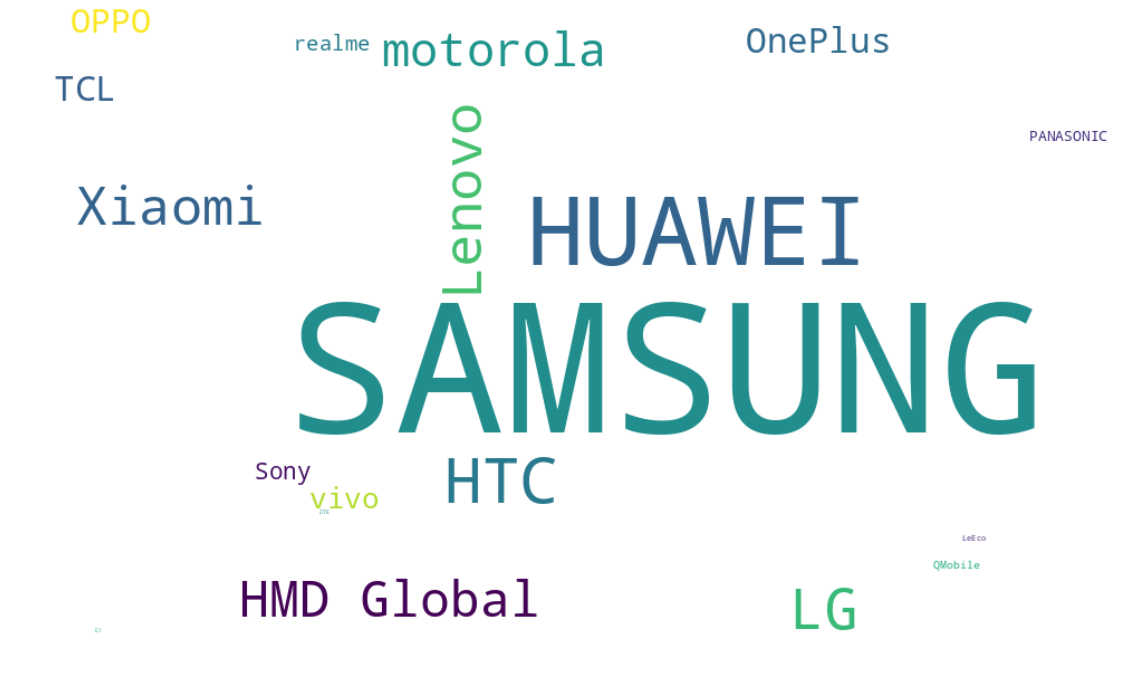

In [14]:
# Another way of plotting these values is by creating a wordcloud
manufacturer_word_cloud = WordCloud(background_color="white", width=1000, height=600)
img = manufacturer_word_cloud.generate_from_frequencies(RSRP_data["DeviceManufacturer"].value_counts())

plt.figure(figsize=(20,15))
plt.imshow(img, interpolation="bilinear")
plt.axis("off")
plt.show()

This visual shows how each class weight in a simple visualization.

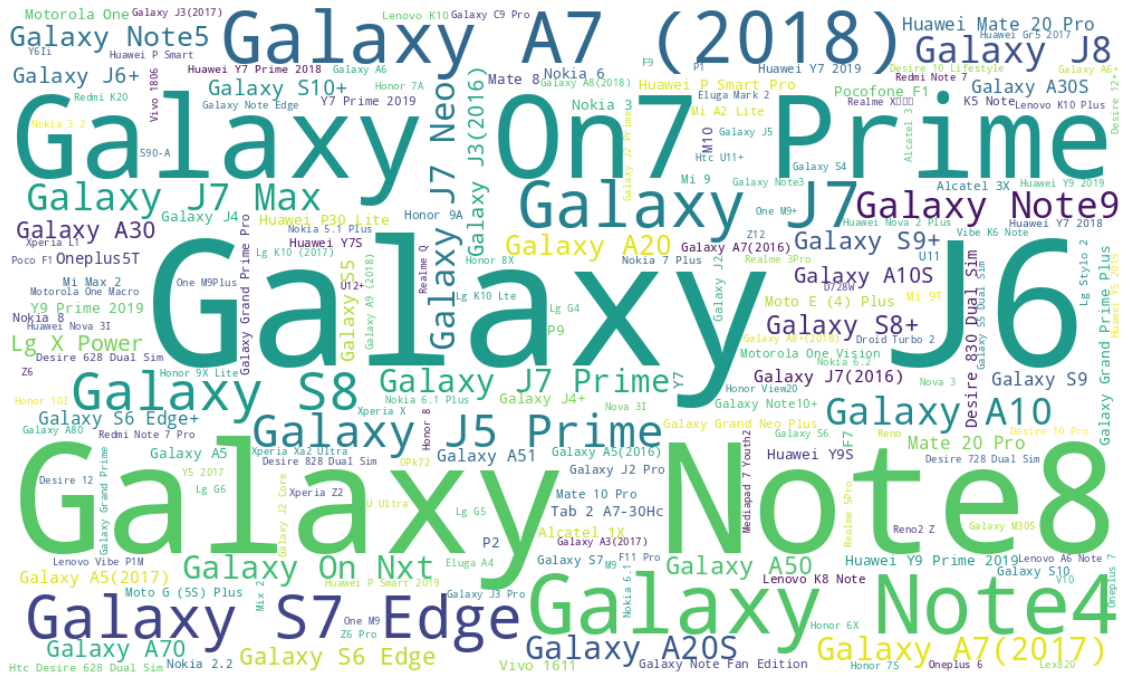

In [15]:
# Another way of plotting these values by creating a wordcloud
manufacturer_word_cloud = WordCloud(background_color="white", width=1000, height=600)
img = manufacturer_word_cloud.generate_from_frequencies(RSRP_data["DeviceName"].value_counts())

plt.figure(figsize=(20,15))
plt.imshow(img, interpolation="bilinear")
plt.axis("off")
plt.show()

**Now**, the *'Timestamp'* column must be converted ti the datetime datatype in pandas. The *'to_datetime'* method is used with the format parameter provided, this helps in making the conversion process quick and more accurate. The formate of the datatime can be deduced from the dataset. Pandas provides a nice way to represent the time in way similar to regex.

In [16]:
# Now let's convert the TimeStamp column to datetime type in pandas, the 'utc' parameter is essential here for this to work!
RSRP_data["Timestamp"] = pd.to_datetime(RSRP_data["Timestamp"], format="%Y-%m-%d %H:%M:%S.%f%z", utc=True)

In [17]:
RSRP_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2725353 entries, 0 to 2725352
Data columns (total 10 columns):
 #   Column                  Dtype              
---  ------                  -----              
 0   Timestamp               datetime64[ns, UTC]
 1   LocationLatitude        float64            
 2   LocationLongitude       float64            
 3   RadioConnectionType     object             
 4   RadioNetworkGeneration  object             
 5   RadioOperatorName       object             
 6   RSRP                    int64              
 7   RadioMobileDataEnabled  object             
 8   DeviceManufacturer      object             
 9   DeviceName              object             
dtypes: datetime64[ns, UTC](1), float64(2), int64(1), object(6)
memory usage: 207.9+ MB


Looking at the Timestamp column, the dtype of Timestamp is now a datetime type

Now let's check our numerical fields to check that they are in the valid range

The valid range for latitude is between +90 and -90, any values outside this range are invalid

In [18]:
RSRP_data[(RSRP_data['LocationLatitude'] > 90) | (RSRP_data['LocationLatitude'] < -90)].value_counts().sum()

0

**All latitude values are valid!**

The valid range for longitude is between +180 and -180, any values outside this range are invalid

In [19]:
RSRP_data[(RSRP_data['LocationLongitude'] > 180) | (RSRP_data['LocationLongitude'] < -180)].value_counts().sum()

0

**All longtitude values are valid!**

There something weird with the RSRP column here, there's a very big positive value and the rest are small negative ones.

The valid range for RSRP is [-44,-140]
Let's look up the invalid values.

In [20]:
RSRP_data_invalid = RSRP_data[(RSRP_data['RSRP'] > -44) | (RSRP_data['RSRP'] < -140)]
RSRP_data_invalid[RSRP_data_invalid["RSRP"] == 2147483647]

Timestamp  LocationLatitude  LocationLongitude  \
0       2019-11-01 21:09:29.386000+00:00         24.540540          46.784737   
1       2019-11-01 21:09:29.386000+00:00         24.540540          46.784737   
2       2019-11-01 21:10:45.323000+00:00         24.540540          46.784737   
3       2019-11-01 21:10:45.323000+00:00         24.540540          46.784737   
4       2019-11-01 21:11:26.822000+00:00         24.540540          46.784737   
...                                  ...               ...                ...   
2724318        2019-11-02 15:59:42+00:00         24.723953          46.669780   
2725269 2019-11-03 08:35:23.171000+00:00         24.812200          46.752940   
2725270 2019-11-03 08:35:32.550000+00:00         24.812200          46.752940   
2725316 2019-11-03 13:50:06.017000+00:00         24.812235          46.752796   
2725325 2019-11-03 14:25:19.527000+00:00         24.812230          46.752800   

        RadioConnectionType RadioNetworkGeneration RadioOperatorName  \
0                    Mobile                     4G        Operator C   
1                    Mobile                     4G        Operator C   
2                    Mobile                     3G        Operator C   
3                    Mobile                     3G        Operator C   
4                    Mobile                     4G        Operator C   
...                     ...                    ...               ...   
2724318              Mobile                     4G        Operator C   
2725269              Mobile                     3G        Operator A   
2725270              Mobile                     4G        Operator A   
2725316              Mobile                     3G        Operator A   
2725325              Mobile                     3G        Operator A   

               RSRP RadioMobileDataEnabled DeviceManufacturer  \
0        2147483647                Enabled                HTC   
1        2147483647                Enabled                HTC   
2        2147483647                Enabled                HTC   
3        2147483647                Enabled                HTC   
4        2147483647                Enabled                HTC   
...             ...                    ...                ...   
2724318  2147483647                Enabled            SAMSUNG   
2725269  2147483647                Enabled            SAMSUNG   
2725270  2147483647                Enabled            SAMSUNG   
2725316  2147483647                Enabled            SAMSUNG   
2725325  2147483647                Enabled            SAMSUNG   

                  DeviceName  
0                      D728W  
1        Desire 728 Dual Sim  
2                      D728W  
3        Desire 728 Dual Sim  
4                      D728W  
...                      ...  
2724318        Galaxy On Nxt  
2725269          Galaxy A20S  
2725270          Galaxy A20S  
2725316          Galaxy A20S  
2725325          Galaxy A20S  

[643705 rows x 10 columns]

***A huge number of invalid data points for RSRP values, however it's better not to drop these datapoints now, these rows still contain useful information that we can use.***

This data contains longtitude and latitude, we were informed that this data is from Saudi Arabia, but we don't know which part of Saudi Arabia. These points can be plotted and using a refrence point (drawn using a red traingle) and google maps or openstreetmaps, we can find the area from which this data came.

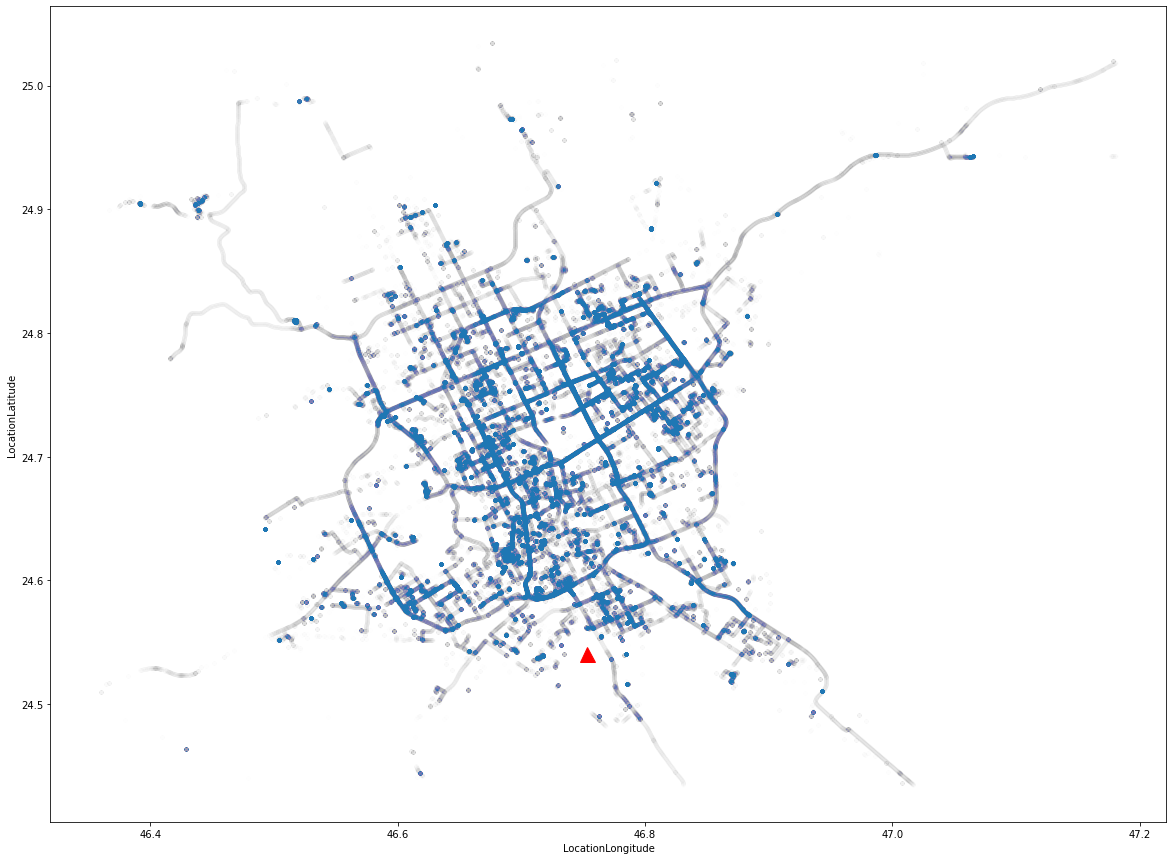

In [21]:
RSRP_data_invalid.plot(kind="scatter", 
                        x="LocationLongitude", 
                        y="LocationLatitude",
                        alpha=0.005,
                        figsize=(20,15))

plt.plot(46.752800, 24.540540, '^r', markersize=15)
plt.show()

***By looking at the google maps and using the red point as a refrence point we can see that this is map of Riyad city.***
<img src="riyad.png"/>

*Now let's look at our valid data:*

In [22]:
RSRP_data_valid = RSRP_data[(RSRP_data['RSRP'] < -44) & (RSRP_data['RSRP'] > -140)]
RSRP_data_valid.sample(40)

Timestamp  LocationLatitude  LocationLongitude  \
2626736 2019-11-04 17:47:58.112000+00:00         24.634819          46.573463   
1613723        2019-11-03 14:47:15+00:00         24.834425          46.800270   
2588330        2019-11-04 17:22:40+00:00         24.771423          46.684400   
368149  2019-11-02 03:54:32.055000+00:00         24.596655          46.680580   
2332108 2019-11-03 08:40:12.018000+00:00         24.526382          46.943960   
1394743 2019-11-03 13:46:25.545000+00:00         24.615126          46.707382   
1096176 2019-11-02 16:25:45.015000+00:00         24.825030          46.812233   
1682041 2019-11-04 12:05:54.062000+00:00         24.801384          46.739580   
2135712 2019-11-04 19:10:40.999000+00:00         24.708874          46.698510   
1334252        2019-11-02 08:31:24+00:00         24.664211          46.615810   
1718524 2019-11-04 20:18:22.015000+00:00         24.720020          46.645340   
9841    2019-11-02 11:23:00.026000+00:00         24.831682          46.609055   
2600103 2019-11-04 17:04:38.032000+00:00         24.706580          46.681507   
372785  2019-11-02 05:31:00.034000+00:00         24.584686          46.904700   
1865507 2019-11-04 13:58:44.058000+00:00         24.517666          46.913048   
1215226 2019-11-03 05:29:07.001000+00:00         24.688370          46.698230   
1589374 2019-11-03 23:44:01.705000+00:00         24.743404          46.747917   
889799         2019-11-02 12:55:50+00:00         24.799404          46.596360   
1947023        2019-11-04 05:38:34+00:00         24.600863          46.704370   
1222224 2019-11-02 15:33:56.003000+00:00         24.654920          46.687810   
1417423 2019-11-03 16:36:24.001000+00:00         24.660513          46.725662   
789156  2019-11-03 02:13:30.064000+00:00         24.596664          46.680600   
66006   2019-11-02 04:48:33.001000+00:00         24.784752          46.726135   
115474         2019-11-02 10:29:22+00:00         24.594189          46.593998   
2511940 2019-11-04 20:03:29.040000+00:00         24.678495          46.710438   
2150586        2019-11-04 00:06:18+00:00         24.832424          46.759663   
217785  2019-11-02 02:51:37.045000+00:00         24.596087          46.679890   
1114199 2019-11-03 00:17:55.081000+00:00         24.596610          46.680570   
2165951        2019-11-03 13:14:45+00:00         24.575200          46.759956   
644552         2019-11-03 16:39:30+00:00         24.736317          46.684870   
2393247 2019-11-04 13:20:39.037000+00:00         24.676466          46.704840   
571380         2019-11-02 15:33:21+00:00         24.826452          46.660330   
1495851 2019-11-03 22:13:00.026000+00:00         24.592453          46.715650   
1449445 2019-11-04 15:30:27.051000+00:00         24.536219          46.686394   
1468227 2019-11-04 04:49:45.015000+00:00         24.635720          46.761505   
488309  2019-11-02 20:14:35.049000+00:00         24.609589          46.685660   
2563559 2019-11-04 15:30:14.031000+00:00         24.622066          46.773357   
964444  2019-11-03 16:50:28.094000+00:00         24.783403          46.748615   
2474082 2019-11-03 09:37:13.831000+00:00         24.627073          46.702564   
549179  2019-11-03 04:15:47.002000+00:00         24.590270          46.646416   

        RadioConnectionType RadioNetworkGeneration RadioOperatorName  RSRP  \
2626736              Mobile                     4G        Operator A   -84   
1613723              Mobile                     4G        Operator A   -76   
2588330              Mobile                     4G        Operator C   -80   
368149               Mobile                     4G        Operator A   -83   
2332108              Mobile                     4G        Operator A   -84   
1394743              Mobile                     4G        Operator B   -82   
1096176              Mobile                     4G        Operator B   -91   
1682041              Mobile                     4G        Operator A  -107   
2135712

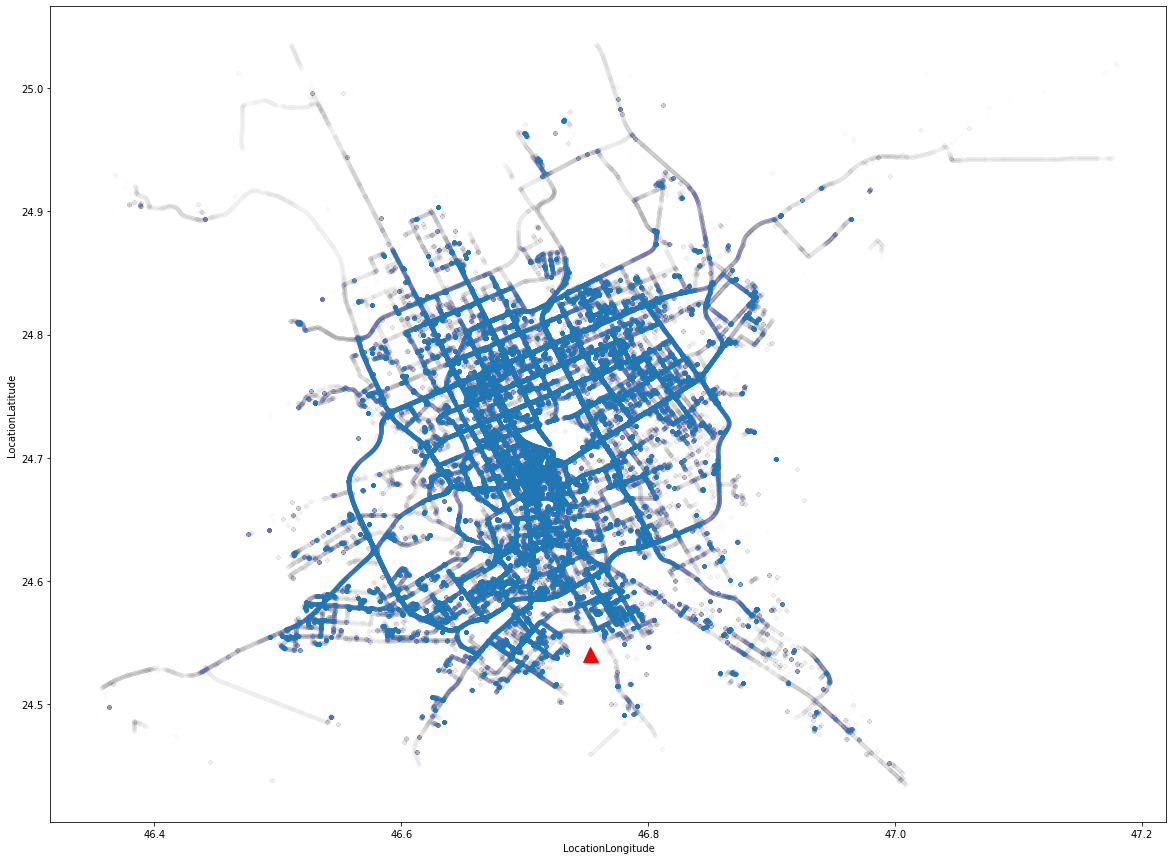

In [23]:
RSRP_data_valid.plot(kind="scatter", 
                        x="LocationLongitude", 
                        y="LocationLatitude",
                        alpha=0.005,
                        figsize=(20,15))

plt.plot(46.752800, 24.540540, '^r', markersize=15)
plt.show()

***Another map of Riyad.***

We can see that the devices with the invalid RSRP value are distributed as much as the ones with a valid RSRP value, i.e there's no areas which appear on a map but not the other. We can't link these invalid values to a certain area or location, furthur investegation is needed.

In [24]:
RSRP_data_invalid.sample(20)

Timestamp  LocationLatitude  LocationLongitude  \
2054487        2019-11-03 17:20:47+00:00         24.562826          46.760586   
2352194 2019-11-02 15:47:53.050000+00:00         24.905077          46.391230   
1137230 2019-11-02 19:33:43.017000+00:00         24.445354          47.004677   
2570267 2019-11-04 05:07:48.041000+00:00         24.753662          46.638710   
1632026 2019-11-03 15:05:04.028000+00:00         24.727892          46.824623   
1629914 2019-11-03 19:49:38.021000+00:00         24.737125          46.830585   
522384         2019-11-02 17:48:48+00:00         24.694807          46.670450   
749703  2019-11-03 11:01:25.030000+00:00         24.814041          46.882347   
2288088        2019-11-03 17:45:03+00:00         24.590405          46.729670   
1394861 2019-11-03 08:15:53.677000+00:00         24.709337          46.675148   
2377349 2019-11-04 13:02:15.001000+00:00         24.564260          46.847042   
2568719        2019-11-04 12:31:38+00:00         24.699116          46.670330   
378655  2019-11-02 12:05:55.114000+00:00         24.826874          46.762016   
1135110 2019-11-03 15:02:21.021000+00:00         24.776888          46.730010   
1608651        2019-11-04 08:18:02+00:00         24.692024          46.649740   
927126  2019-11-03 11:57:36.023000+00:00         24.831938          46.794903   
1034346        2019-11-02 18:10:34+00:00         24.617330          46.692825   
2021045 2019-11-03 10:13:05.074000+00:00         24.564363          46.755173   
2463825 2019-11-04 16:47:05.029000+00:00         24.806860          46.769485   
80702          2019-11-02 10:06:43+00:00         24.629340          46.761270   

        RadioConnectionType RadioNetworkGeneration RadioOperatorName  \
2054487              Mobile                     3G        Operator A   
2352194              Mobile                     3G        Operator A   
1137230              Mobile                     2G        Operator B   
2570267              Mobile                     3G        Operator A   
1632026              Mobile                     3G        Operator A   
1629914              Mobile                     3G        Operator B   
522384               Mobile                     3G        Operator A   
749703               Mobile                     3G        Operator A   
2288088              Mobile                     3G        Operator A   
1394861              Mobile                     4G        Operator B   
2377349              Mobile                     3G        Operator A   
2568719              Mobile                     3G        Operator A   
378655               Mobile                     4G        Operator B   
1135110              Mobile                Unknown        Operator C   
1608651              Mobile                     3G        Operator B   
927126               Mobile                     3G        Operator B   
1034346              Mobile                     3G        Operator A   
2021045              Mobile                Unknown        Operator B   
2463825              Mobile                     3G        Operator B   
80702                Mobile                     4G        Operator A   

               RSRP RadioMobileDataEnabled DeviceManufacturer  \
2054487  2147483647                Enabled            SAMSUNG   
2352194  2147483647                Enabled            SAMSUNG   
1137230  2147483647                Enabled            SAMSUNG   
2570267  2147483647                Enabled            SAMSUNG   
1632026  2147483647                Enabled            SAMSUNG   
1629914  2147483647                Enabled            SAMSUNG   
522384   2147483647                Enabled            SAMSUNG   
749703   2147483647                Enabled            SAMSUNG   
2288088  2147483647                Enabled            SAMSUNG   
1394861  2147483647                Enabled            SAMSUNG   
2377349  2147483647                Enabled            SAMSUNG   
2568719  2147483647                E

In [25]:
RSRP_data_invalid["DeviceManufacturer"].value_counts()

SAMSUNG       598200
Lenovo         12956
HUAWEI         10099
motorola        4743
HTC             3876
LG              3025
OnePlus         2547
HMD Global      2442
Sony            1934
Xiaomi          1199
OPPO             855
vivo             546
QMobile          535
PANASONIC        496
TCL              324
realme           168
E1               135
Hisense           40
OBI                9
Mione              9
Infinix            8
ZTE                6
LAVA               6
SHARP              5
Name: DeviceManufacturer, dtype: int64

By looking at these numbers and the number for the whole dataset, the issue seems to be happening across all types of devices and not specific to a type. The order of the devices manufacturer is almost the same.

In [26]:
RSRP_data_invalid['RSRP'].value_counts()

 2147483647    643705
 0                455
-1                  2
 12                 1
Name: RSRP, dtype: int64

In [27]:
RSRP_data_invalid[RSRP_data_invalid["RSRP"] == 0].sample(20)

Timestamp  LocationLatitude  LocationLongitude  \
141800  2019-11-02 11:25:00.034000+00:00         24.824170          46.607550   
142029  2019-11-02 14:30:24.035000+00:00         24.630789          46.718903   
141874  2019-11-02 11:28:07.045000+00:00         24.830040          46.590706   
300026  2019-11-02 11:35:28.041000+00:00         24.826967          46.565060   
141918  2019-11-02 11:30:37.028000+00:00         24.828419          46.570750   
9852    2019-11-02 11:23:59.031000+00:00         24.831740          46.611153   
299670  2019-11-02 11:24:01.039000+00:00         24.831602          46.611225   
2716148 2019-11-03 13:59:34.031000+00:00         24.664839          46.732090   
299687  2019-11-02 11:24:55.028000+00:00         24.824532          46.608383   
10014   2019-11-02 11:34:24.092000+00:00         24.826904          46.564705   
141956  2019-11-02 11:32:42.052000+00:00         24.827375          46.566013   
141871  2019-11-02 11:28:04.039000+00:00         24.829546          46.590958   
10016   2019-11-02 11:34:26.119000+00:00         24.826902          46.564710   
141783  2019-11-02 11:24:17.015000+00:00         24.829815          46.612026   
9869    2019-11-02 11:25:15.038000+00:00         24.823406          46.606125   
157116  2019-11-02 11:24:50.038000+00:00         24.824932          46.609344   
300086  2019-11-02 14:31:43.031000+00:00         24.630070          46.717310   
9899    2019-11-02 11:27:30.042000+00:00         24.826859          46.592346   
9855    2019-11-02 11:24:06.047000+00:00         24.831154          46.611440   
9932    2019-11-02 11:29:43.030000+00:00         24.832142          46.579704   

        RadioConnectionType RadioNetworkGeneration RadioOperatorName  RSRP  \
141800               Mobile                     4G        Operator A     0   
142029               Mobile                     4G        Operator A     0   
141874               Mobile                     4G        Operator A     0   
300026               Mobile                     4G        Operator A     0   
141918               Mobile                     4G        Operator A     0   
9852                 Mobile                     4G        Operator A     0   
299670               Mobile                     4G        Operator A     0   
2716148              Mobile                     4G        Operator A     0   
299687               Mobile                     4G        Operator A     0   
10014                Mobile                     4G        Operator A     0   
141956               Mobile                     4G        Operator A     0   
141871               Mobile                     4G        Operator A     0   
10016                Mobile                     4G        Operator A     0   
141783               Mobile                     4G        Operator A     0   
9869                 Mobile                     4G        Operator A     0   
157116               Mobile                     4G        Operator A     0   
300086               Mobile                     4G        Operator A     0   
9899                 Mobile                     4G        Operator A     0   
9855                 Mobile                     4G        Operator A     0   
9932                 Mobile                     4G        Operator A     0   

        RadioMobileDataEnabled DeviceManufacturer DeviceName  
141800                 Enabled             HUAWEI       Y6Ii  
142029                 Enabled             HUAWEI       Y6Ii  
141874                 Enabled             HUAWEI       Y6Ii  
300026                 Enabled             HUAWEI       Y6Ii  
141918                 Enabled             HUAWEI       Y6Ii  
9852                   Enabled             HUAWEI       Y6Ii  
299670                 Enabled             HUAWEI       Y6Ii  
2716148                Enabled             HUAWEI       Y6Ii  
299687                 Enabled             HUAWEI       Y6Ii  
10014                  Enabled             HUAWEI       Y6Ii

Reporting a 0 for the RSRP value seems to be an issue for HUAWEI Y6li model. By searching online, the large positive value, 2147483647, is the largest number an integer can hold (according to android documentation), and it's reported by android devices when the RSRP value isn't avaliable on the device (due to congestion and other factors). But a 0 value is unexpected.

In [28]:
RSRP_data[RSRP_data["DeviceName"] == "Y6Ii"]["DeviceName"].value_counts()

Y6Ii    1009
Name: DeviceName, dtype: int64

In [29]:
RSRP_data_invalid[RSRP_data_invalid["DeviceName"] == "Y6Ii"]["DeviceName"].value_counts()

Y6Ii    429
Name: DeviceName, dtype: int64

In [30]:
RSRP_data_invalid[RSRP_data_invalid["RSRP"] == 0]["DeviceManufacturer"].value_counts()

HUAWEI    455
Name: DeviceManufacturer, dtype: int64

We can see that this an issue onlt happening with HUAWEI devices and especially the model Y6li

In [31]:
RSRP_data_invalid["DeviceName"].value_counts()

Galaxy A7 (2018)    103799
Galaxy J6            69785
Galaxy On7 Prime     47702
Galaxy Note4         45088
Galaxy S7 Edge       31853
                     ...  
P20Pro                   1
P20 Pro                  1
Z6 Pro                   1
Z6                       1
Redmi Note 8 Pro         1
Name: DeviceName, Length: 255, dtype: int64

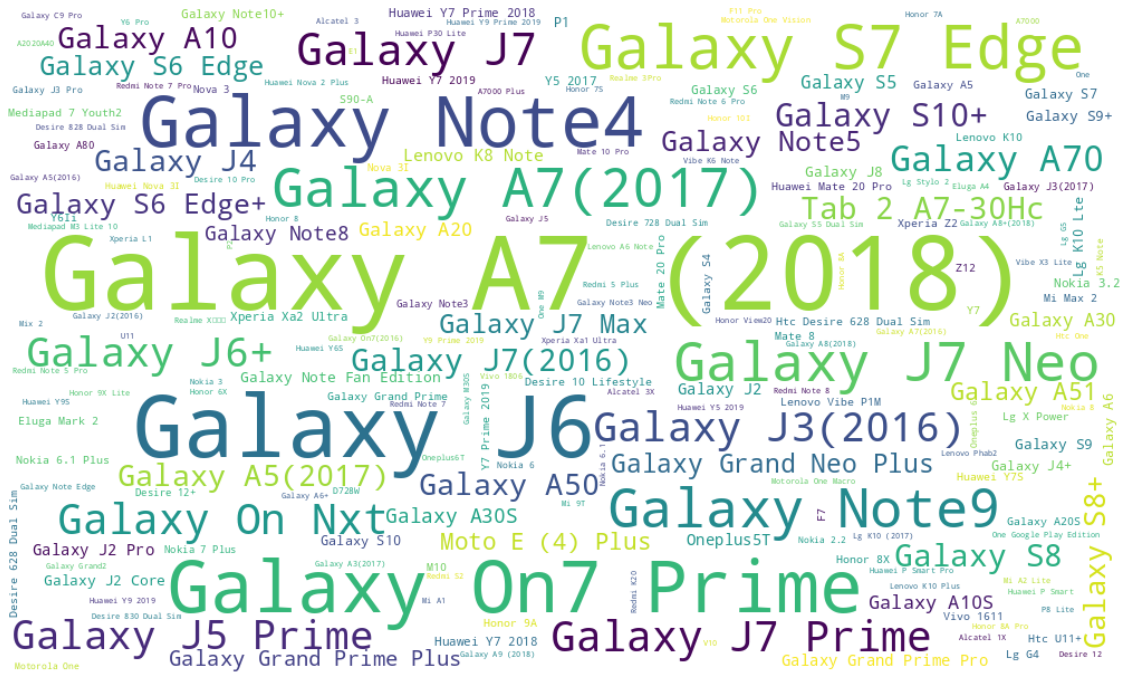

In [32]:
# Another way of plotting these values by creating a wordcloud
manufacturer_word_cloud = WordCloud(background_color="white", width=1000, height=600)
img = manufacturer_word_cloud.generate_from_frequencies(RSRP_data_invalid["DeviceName"].value_counts())

plt.figure(figsize=(20,15))
plt.imshow(img, interpolation="bilinear")
plt.axis("off")
plt.show()

This is a wordcloud of the invalid RSRP values devices.
For the most part devices are with same distribution.

# Plotting:
We should plot this data in a better way without overplotting or undersampling. This can be achieved using the holoviews ecosystem with its libraries like datashader, holoviews.pandas, hvplot and colorcet

In [33]:
# Don't use the 'TimeStamp' as an index because there are duplicates!
RSRP_data_time_sorted = RSRP_data.sort_values(by="Timestamp", ignore_index=True)
# RSRP_data_valid_time_sorted = RSRP_data_valid_time_sorted.set_index("Timestamp")
RSRP_data_time_sorted.head(10)

Timestamp  LocationLatitude  LocationLongitude  \
0 2019-11-01 18:15:32.097000+00:00         24.639421           46.73017   
1 2019-11-01 18:15:32.505000+00:00         24.639421           46.73017   
2 2019-11-01 18:15:50.376000+00:00         24.639421           46.73017   
3 2019-11-01 18:20:11.389000+00:00         24.639421           46.73017   
4 2019-11-01 18:20:12.035000+00:00         24.639421           46.73017   
5 2019-11-01 18:20:13.264000+00:00         24.639421           46.73017   
6 2019-11-01 18:20:16.996000+00:00         24.639421           46.73017   
7 2019-11-01 18:21:45.695000+00:00         24.639421           46.73017   
8 2019-11-01 18:22:37.206000+00:00         24.639421           46.73017   
9 2019-11-01 18:36:43.521000+00:00         24.626589           46.68925   

  RadioConnectionType RadioNetworkGeneration RadioOperatorName        RSRP  \
0              Mobile                     4G        Operator B        -110   
1              Mobile                     4G        Operator B        -106   
2              Mobile                     4G        Operator B         -93   
3              Mobile                     4G        Operator B        -107   
4              Mobile                     4G        Operator B        -111   
5              Mobile                     4G        Operator B        -106   
6              Mobile                     3G        Operator B  2147483647   
7              Mobile                     3G        Operator B  2147483647   
8              Mobile                     4G        Operator B         -98   
9              Mobile                     4G        Operator C         -95   

  RadioMobileDataEnabled DeviceManufacturer               DeviceName  
0                Enabled            SAMSUNG           Galaxy S7 Edge  
1                Enabled            SAMSUNG           Galaxy S7 Edge  
2                Enabled            SAMSUNG           Galaxy S7 Edge  
3                Enabled            SAMSUNG           Galaxy S7 Edge  
4                Enabled            SAMSUNG           Galaxy S7 Edge  
5                Enabled            SAMSUNG           Galaxy S7 Edge  
6                Enabled            SAMSUNG           Galaxy S7 Edge  
7                Enabled            SAMSUNG           Galaxy S7 Edge  
8                Enabled            SAMSUNG           Galaxy S7 Edge  
9                Enabled            SAMSUNG  Galaxy Grand Prime Plus

In [34]:
df = RSRP_data.copy()

# This step is needed to prepare the data to be plotted on the map
df["LocationLongitude"], df["LocationLatitude"] = lnglat_to_meters(df["LocationLongitude"], df["LocationLatitude"])

In [59]:
# Using the map tiles provided by Esri. OpenStreetMaps can be used as well
# map_tiles = EsriImagery().opts( alpha=0.3, width=1000, height=700, bgcolor='black')

# users_points = hv.Points(RSRP_data_houred, ['LocationLongitude', 'LocationLatitude'])
# # downsampling using datashader
# users_points_downsampled = datashade(users_points, cmap=cc.fire, width=1000, height=700)

# # plotting the points over a map provided by the tiles elements 
# map_tiles * users_points_downsampled

# plot = RSRP_data_houred.hvplot.scatter("LocationLongitude",
#                                 "LocationLatitude",
#                                 rasterize=True,
#                                 cmap=cc.fire,
#                                 cnorm='eq_hist',
#                                 colorbar=False,
#                                 xaxis=None,
#                                 yaxis=None,
#                                 )
# map_tiles * plot 

# pointsA =  hv.Points(df[df["RadioOperatorName"] == "Operator A"], kdims=["LocationLongitude", "LocationLatitude"])
# rasterA = hv.operation.datashader.rasterize(pointsA).opts(cmap=cc.kr, cnorm="eq_hist", width=1000)
# highlightA = hv.operation.datashader.inspect(rasterA).opts(marker="o", size=10, fill_alpha=0, color='red', tools=["hover"])4
    
# pointsB =  hv.Points(df[df["RadioOperatorName"] == "Operator B"], kdims=["LocationLongitude", "LocationLatitude"])
# rasterB = hv.operation.datashader.rasterize(pointsB).opts(cmap=cc.kb, cnorm="eq_hist", width=1000)
# highlightB = hv.operation.datashader.inspect(rasterB).opts(marker="o", size=10, fill_alpha=0, color='green', tools=["hover"])

# pointsC =  hv.Points(df[df["RadioOperatorName"] == "Operator C"], kdims=["LocationLongitude", "LocationLatitude"])
# rasterC = hv.operation.datashader.rasterize(pointsC).opts(cmap=cc.kg, cnorm="eq_hist", width=1000)
# highlightC = hv.operation.datashader.inspect(rasterC).opts(marker="o", size=10, fill_alpha=0, color='blue', tools=["hover"])

# esri  * rasterB * highlightB * rasterC * highlightC* rasterA * highlightA

esri = hv.element.tiles.ESRI().redim(x="Longtitude", y="Latitude").opts(alpha=0.2, width=1000, height=700, bgcolor='black')
COLORS ={"Operator A":"red", "Operator B": "green", "Operator C": "blue"}

def operator_map(operator_name):
    # Best Method of plotting to get inspect while using datashader
    df_operator = df[df["RadioOperatorName"] == operator_name].copy()
    
    operator_points =  hv.Points(df_operator, kdims=["LocationLongitude", "LocationLatitude"])
    # raster = rasterize(operator_points).opts(cmap=cc.fire, cnorm="eq_hist")
    shaded = datashade(operator_points, color_key=COLORS, cnorm="eq_hist", aggregator=ds.any(), width=1000, height=700)
    highlight = inspect(shaded).opts(marker="o", size=10, fill_alpha=0, color='white', tools=["hover"])
    return esri * shaded * highlight
    
operator_select = pn.widgets.RadioButtonGroup(options=list(color_key.keys()))
interactive = pn.bind(operator_map, operator_select)
first_app = pn.Column(operator_select, interactive)
first_app

Column
    [0] RadioButtonGroup(options=['Operator A', ...], value='Operator A')
    [1] ParamFunction(function)

In this map we can see the how speard every operator users are and which areas are a hotspot, <span style="color:red">*Operator A*</span> is show in <span style="color:red">*red*</span>, <span style="color:green">*Operator B*</span> is show in <span style="color:green">*green*</span>, <span style="color:blue">*Operator C*</span> is show in <span style="color:blue">*blue*</span>.

In [49]:
esri = hv.element.tiles.ESRI().redim(x="Longtitude", y="Latitude").opts(alpha=0.2, width=1000, height=700, bgcolor='black')
color_key ={"Operator A":"red", "Operator B": "green", "Operator C": "blue"}

points =  hv.Points(df, kdims=["LocationLongitude", "LocationLatitude"])
rastered = rasterize(points).opts(cmap=cc.fire, cnorm="eq_hist", width=1000, height=700)
highlight = inspect(rastered).opts(marker="o", size=10, fill_alpha=0, color='white', tools=["hover"])
esri  * rastered * highlight 

:DynamicMap   []
   :Overlay
      .Tiles.I  :Tiles   [Longtitude,Latitude]
      .Image.I  :Image   [LocationLongitude,LocationLatitude]   (LocationLongitude_LocationLatitude Count)
      .Points.I :Points   [LocationLongitude,LocationLatitude]   (Timestamp,RadioConnectionType,RadioNetworkGeneration,RadioOperatorName,RSRP,RadioMobileDataEnabled,DeviceManufacturer,DeviceName)

After cleaning the data is better to save it in a new file, so we don't have to go through all of this processing again if we needed to do more processing.
I'll use a better format than CSV called Parquet, it's built-in pandas only requires the installation of fastparquet library.

In [37]:
RSRP_data.to_parquet("RSRP_data.parq")
RSRP_data_time_sorted.to_parquet("RSRP_data_time_sorted.parq")